## Modelo Neuronal Fitzhugh-Nagumo


#### El presente desarrollo describe parte de las caracterizaciones del modelo neuronal Integrate and Fire, siendo este modelo una aproximación más exacta del comportamiento neuronal y las interaciones entre sodio $Na+$ y potacio $K+$, con sus respectivos diferenciales de potencial (nano-escala).
#### El siguiente desarrollo se planteó a partir de un problema del libro, "NONLINEAR DYNAMICS AND CHAOS" de Steven H. Strogatz -- sección 7.5 --- problema 7.5.6 ---  tópico d).
#### También se utilizó los resultados presentados por el Dr Francisco Tamarit de la Facultad de Matemática, Astronomía, Física y Computación (Universidad Nacional de Córdoba) dictado en el curso de redes neuronales 2021

In [47]:
##### LIBRERIA A CARGO DEL LECTOR ######

## Definiendo el sistema de ecuaciones diferenciales que modela el impulso neuronal


\begin{equation}
\begin{cases}
\frac{du}{dt} = u - u^3 - v + I_\text{e}(t)\\
\tau \frac{dv}{dt} = u - \theta - \beta v 
\end{cases}
\end{equation}

Donde $\theta$ y $\beta$ son los parámetros exitatorios e inhibitorios del modelo. En definitiva, configuran ámbos el diferencial de potencial. Expresando el sistema de la siguiente manera:

\begin{eqnarray*}
 \begin{pmatrix}
 \dot{u} \\
 \dot{v}
 \end{pmatrix}
 & = &
 \begin{pmatrix}
 m(u,v) \\
 n(u,v)
 \end{pmatrix}
 & = &
 \begin{pmatrix}
 u - u^3 - v + I_\text{e}(t) \\
 u - \theta - \beta v
 \end{pmatrix}
\end{eqnarray*}

In [48]:
#Definiendo el sistema de la ODE:

def H_F(x,t,theta=0.1, beta=0.25, cte=0.5, P=0.02):
    return np.array([cte*(x[0]+ x[1]- x[0]**3/3 + P),-1/cte*(x[0]- theta + beta*x[1])])

### Utilizando el método numérico de Runge-Kutta de 4° Orden para aproximar la solución

In [49]:
def RK_4(t0 = 0, x0 = np.array([1.]), t1 = 15, dt = 0.01, ng = 0):
    tsp = np.arange(t0, t1, dt)
    Nsize = np.size(tsp)
    X = np.empty((Nsize, np.size(x0)))
    X[0] = x0
    
    for i in range(1, Nsize):
        k1 = ng(X[i-1],tsp[i-1])
        k2 = ng(X[i-1] + dt/2*k1, tsp[i-1] + dt/2)
        k3 = ng(X[i-1] + dt/2*k2, tsp[i-1] + dt/2)
        k4 = ng(X[i-1] + dt*k3, tsp[i-1] + dt)
        X[i] = X[i-1] + dt/6*(k1 + 2*k2 + 2*k3 + k4)
    print(X[i])
    return X


[ 0.10176033 -0.23458413]


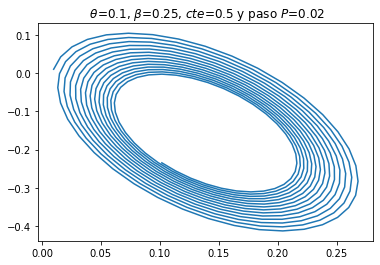

None


In [50]:
def do_plot():
    pylab.figure()
    X = RK_4(x0 = np.array([0.01,0.01]), t1 = 100,dt = 0.2, ng = H_F)
    pylab.plot(X[:,0], X[:,1])
    pylab.title(label = r" $\theta$=0.1, $\beta$=0.25, $cte$=0.5 y paso $P$=0.02")
    pylab.show()
    
    return

print(do_plot())